# 02 Linear Q agent

#### 👉 Let's use a linear model to approximat the q-value function.

![linear_model.jpg](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/linear_model.jpg?raw=true)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [1]:
import gym
env = gym.make('CartPole-v1')

# LAPADULA: Workaround for pygame error: "error: No available video device"
# LAPADULA: See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# LAPADULA: This is only needed, I think, for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

## Hyperparameters

In [2]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.0005652080372498697,
    'discount_factor': 0.99,
    'batch_size': 64,
    'memory_size': 100000,
    'freq_steps_train': 128,
    'freq_steps_update_target': 100,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.0429612235926375,
    'steps_epsilon_decay': 1000
}

SEED = 2636569667

## ⚠️ Fix random seeds

In [3]:
from src.utils import set_seed
set_seed(env, SEED)

## QAgent

In [4]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


## Train the agent 🏋️

In [5]:
from src.loops import train
train(agent, env, n_episodes=2000)

 10%|███████▍                                                                 | 204/2000 [00:07<04:06,  7.28it/s]

Reward mean: 215.39, std: 31.98
Num steps mean: 215.39, std: 31.98


 20%|██████████████▋                                                          | 403/2000 [00:17<05:24,  4.92it/s]

Reward mean: 325.01, std: 74.61
Num steps mean: 325.01, std: 74.61


 30%|█████████████████████▉                                                   | 600/2000 [00:34<16:20,  1.43it/s]

Reward mean: 388.43, std: 78.37
Num steps mean: 388.43, std: 78.37


 40%|█████████████████████████████▍                                           | 805/2000 [00:48<03:43,  5.36it/s]

Reward mean: 246.66, std: 88.14
Num steps mean: 246.66, std: 88.14


 50%|████████████████████████████████████                                    | 1001/2000 [00:58<04:09,  4.01it/s]

Reward mean: 233.55, std: 76.41
Num steps mean: 233.55, std: 76.41


 60%|███████████████████████████████████████████▎                            | 1202/2000 [01:09<03:47,  3.50it/s]

Reward mean: 214.21, std: 58.58
Num steps mean: 214.21, std: 58.58


 70%|██████████████████████████████████████████████████▌                     | 1403/2000 [01:21<02:14,  4.43it/s]

Reward mean: 193.29, std: 43.07
Num steps mean: 193.29, std: 43.07


 80%|█████████████████████████████████████████████████████████▋              | 1602/2000 [01:32<01:56,  3.41it/s]

Reward mean: 185.18, std: 40.49
Num steps mean: 185.18, std: 40.49


 90%|████████████████████████████████████████████████████████████████▊       | 1802/2000 [01:45<01:10,  2.81it/s]

Reward mean: 175.02, std: 44.96
Num steps mean: 175.02, std: 44.96


100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [01:55<00:00, 17.31it/s]

Reward mean: 159.43, std: 39.42
Num steps mean: 159.43, std: 39.42


## Evaluate the agent ⏱️

In [6]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.36it/s]


In [8]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 164.65, std 39.46


## Let's see how far we got in each attempt

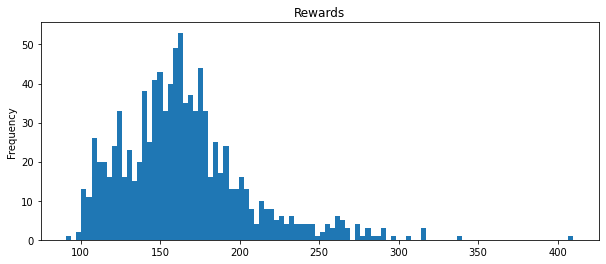

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [9]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)

In [8]:
eval_rewards, eval_steps = evaluate(
    agent, env,
    n_episodes=10,
    epsilon=0.001
)
eval_rewards

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 105.16it/s]
